In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('im_example.jpg', cv2.IMREAD_GRAYSCALE)

(-0.5, 1399.5, 932.5, -0.5)

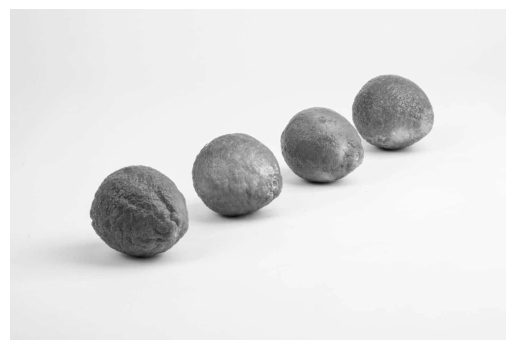

In [3]:
plt.imshow(img, cmap="gray")
plt.axis('off')

## Thresholding

In [4]:
#Using Threshold
_, thresh1 = cv2.threshold(img, 180, 200, cv2.THRESH_BINARY_INV) 

(-0.5, 1399.5, 932.5, -0.5)

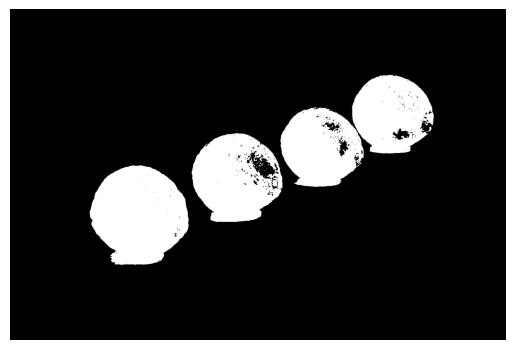

In [5]:
plt.imshow(thresh1, cmap="gray")
plt.axis('off')

In [6]:
#Using inRange
thresh2 = cv2.inRange(img, lowerb=50, upperb=180)

(-0.5, 1399.5, 932.5, -0.5)

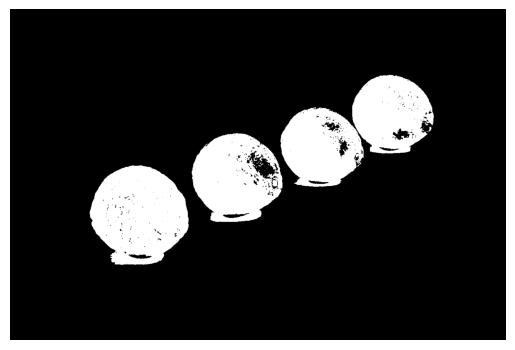

In [7]:
plt.imshow(thresh2, cmap="gray")
plt.axis('off')

## Morphology

In [8]:
#Structure Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 8))
binary = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)

(-0.5, 1399.5, 932.5, -0.5)

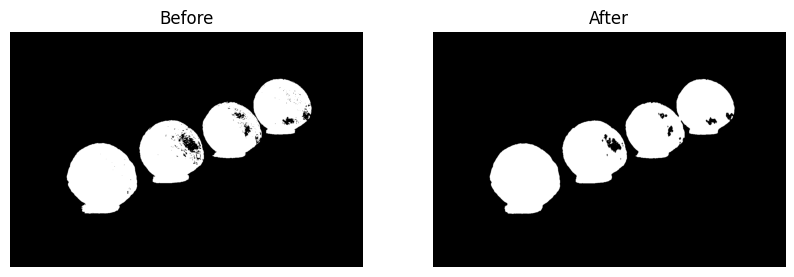

In [9]:
ax1 = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(thresh1, cmap="gray")
plt.title('Before')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(binary, cmap="gray")
plt.title('After')
plt.axis('off')

In [10]:
#Floodfill 
h, w = thresh1.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

im_floodfill = thresh1.copy()
    
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask=mask, seedPoint=(0,0), newVal=255);
    
# Invert floodfilled image
img_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
img_flood = thresh1 | img_floodfill_inv

(-0.5, 1399.5, 932.5, -0.5)

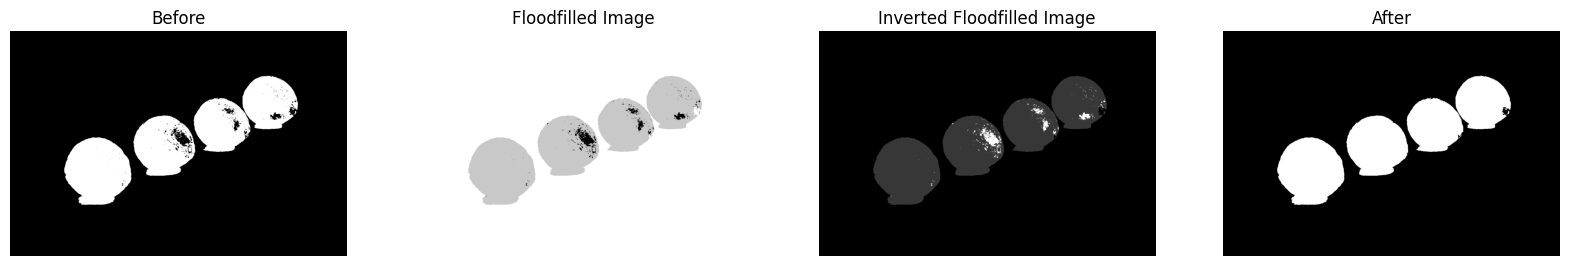

In [11]:
ax1 = plt.figure(figsize=(20,15))
plt.subplot(1,4,1)
plt.imshow(thresh1, cmap="gray")
plt.title('Before')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(im_floodfill, cmap="gray")
plt.title('Floodfilled Image')
plt.axis('off')

plt.subplot(1,4, 3)
plt.imshow(img_floodfill_inv, cmap="gray")
plt.title('Inverted Floodfilled Image')
plt.axis('off')

plt.subplot(1,4, 4)
plt.imshow(img_flood, cmap="gray")
plt.title('After')
plt.axis('off')

## Counting Objects

In [12]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
count = 0
size = 2900
h, w = thresh1.shape[:2]
result = np.zeros((h, w), dtype=np.uint8)

for idx, contour in enumerate(contours):
    # Calculate contour area
    area = cv2.contourArea(contour)
    if area > size:
        cv2.drawContours(result, contours=contours, contourIdx=idx, color=255, thickness=-1)
        count += 1

Number of objects: 4


(-0.5, 1399.5, 932.5, -0.5)

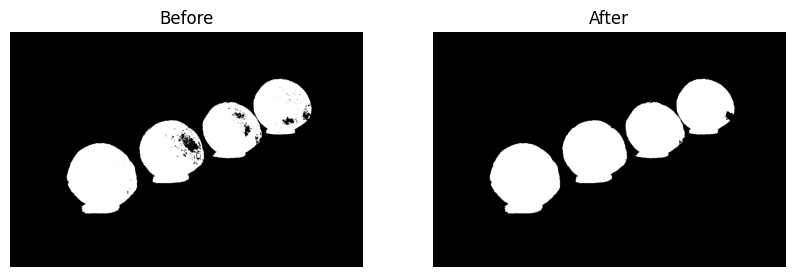

In [14]:
print(f"Number of objects: {count}")

ax1 = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(thresh1, cmap="gray")
plt.title('Before')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(result, cmap="gray")
plt.title('After')
plt.axis('off')